In [9]:
!pip install scipy


   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---- ----------------------------------- 3.9/38.5 MB 20.2 MB/s eta 0:00:02
   -------- ------------------------------- 7.9/38.5 MB 20.3 MB/s eta 0:00:02
   ----------- ---------------------------- 11.3/38.5 MB 18.5 MB/s eta 0:00:02
   --------------- ------------------------ 14.9/38.5 MB 18.1 MB/s eta 0:00:02
   ------------------- -------------------- 18.6/38.5 MB 18.0 MB/s eta 0:00:02
   ----------------------- ---------------- 22.5/38.5 MB 18.1 MB/s eta 0:00:01
   ---------------------------- ----------- 27.0/38.5 MB 18.4 MB/s eta 0:00:01
   -------------------------------- ------- 30.9/38.5 MB 18.6 MB/s eta 0:00:01
   ----------------------------------- ---- 34.1/38.5 MB 18.3 MB/s eta 0:00:01
   -------------------------------------- - 37.5/38.5 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 17.5 MB/s  0:00:02


In [12]:
import pandas as pd

In [10]:
# Import necessary packages
import numpy as np
from scipy.integrate import odeint
# !pip install scipy matplotlib
import matplotlib.pyplot as plt


In [1]:
def SICZ(x, t, parameters):
    # Extract state variables
    S = x[0]
    I = x[1]
    C = x[2]
    Z = x[3]

    N = S + I + C

    # Extract parameters
    beta_p = parameters['beta_p']  # transmission
    beta_c = parameters['beta_c']  # transmission from carcass
    beta_z = parameters['beta_z']  # transmission from zoospore pool
    a = parameters['a']            # disease induced death rate
    lamdaC = parameters['lamdaC']  # decay of carcass
    sigma = parameters['sigma']    # shed rate from infected
    mu = parameters['mu']          # shed rate from carcass
    lamdaZ = parameters['lamdaZ']  # decay rate of zoospores
    r = parameters['r']            # recovery rate

    # Differential equations
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dI, dC, dZ]


In [13]:
# Initial conditions for Large, Medium, Small populations
initial_cond_Large = [999, 1, 0, 0]   # S, I, C, Z
initial_cond_Med = [99, 1, 0, 0]
initial_cond_Small = [9, 1, 0, 0]

# Time points
times = np.linspace(0, 365, 365)

# Parameters dictionary
params = {
    "beta_p": 0.023,
    "beta_c": 0.023,
    "beta_z": 0.0001,
    "lamdaC": 1/4,
    "lamdaZ": 1/21.6,
    "sigma": 0.001,
    "mu": 0.01,
    "a": 1/26.5,
    "r": 0  # Add recovery rate if needed, or remove if not used
}

# Solve ODE for each initial condition
resultsSICZLarge = odeint(SICZ, initial_cond_Large, times, args=(params,))
resultsSICZSmall = odeint(SICZ, initial_cond_Small, times, args=(params,))
resultsSICZMed = odeint(SICZ, initial_cond_Med, times, args=(params,))

# Convert results to DataFrame
resultsSICZLarge_df = pd.DataFrame(resultsSICZLarge, columns=['S', 'I', 'C', 'Z'])
resultsSICZSmall_df = pd.DataFrame(resultsSICZSmall, columns=['S', 'I', 'C', 'Z'])
resultsSICZMed_df = pd.DataFrame(resultsSICZMed, columns=['S', 'I', 'C', 'Z'])

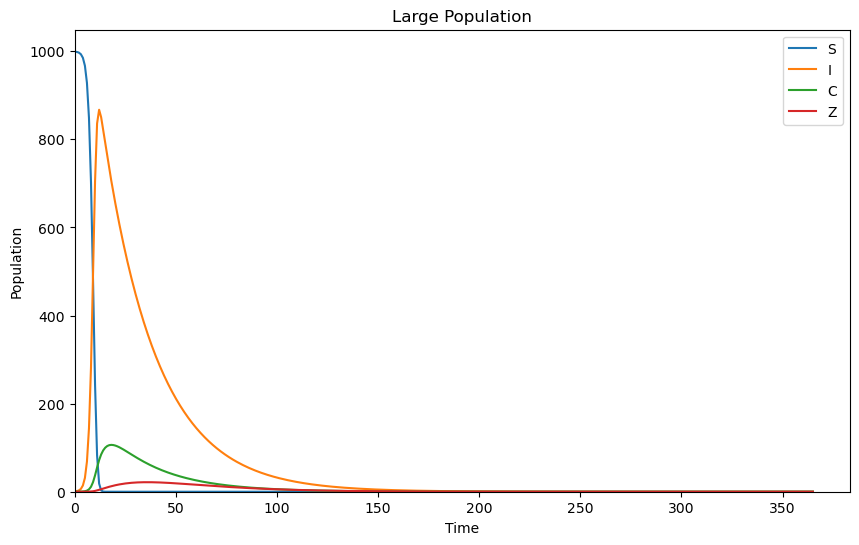

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(times, resultsSICZLarge_df['S'], label='S')
plt.plot(times, resultsSICZLarge_df['I'], label='I')
plt.plot(times, resultsSICZLarge_df['C'], label='C')
plt.plot(times, resultsSICZLarge_df['Z'], label='Z')
plt.title("Large Population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

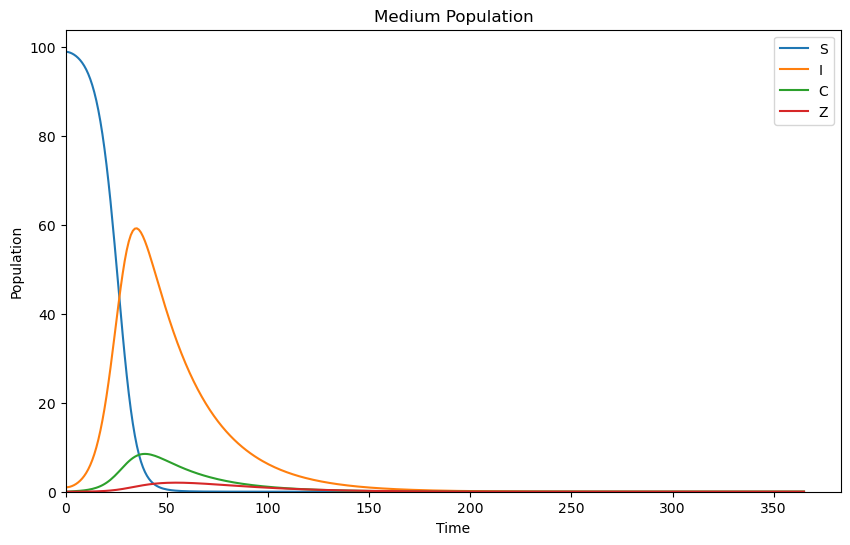

In [16]:

plt.figure(figsize=(10, 6))
plt.plot(times, resultsSICZMed_df['S'], label='S')
plt.plot(times, resultsSICZMed_df['I'], label='I')
plt.plot(times, resultsSICZMed_df['C'], label='C')
plt.plot(times, resultsSICZMed_df['Z'], label='Z')
plt.title("Medium Population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

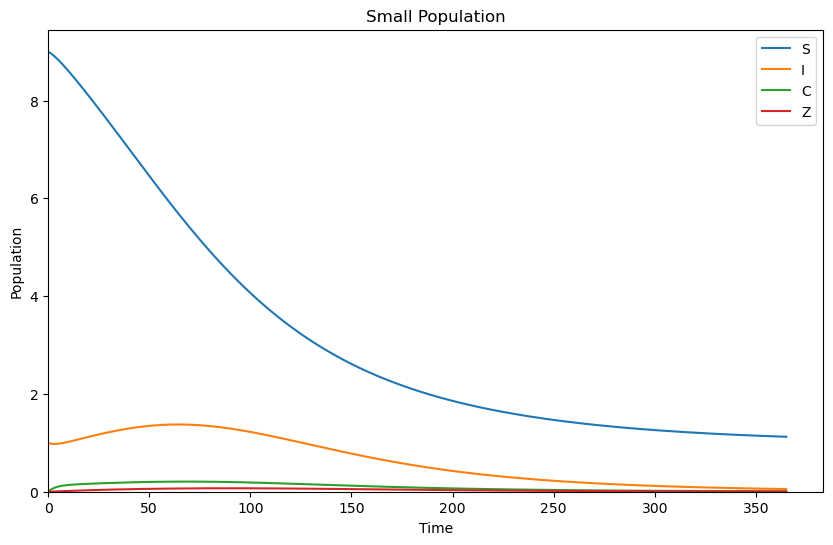

In [17]:

plt.figure(figsize=(10, 6))
plt.plot(times, resultsSICZSmall_df['S'], label='S')
plt.plot(times, resultsSICZSmall_df['I'], label='I')
plt.plot(times, resultsSICZSmall_df['C'], label='C')
plt.plot(times, resultsSICZSmall_df['Z'], label='Z')
plt.title("Small Population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

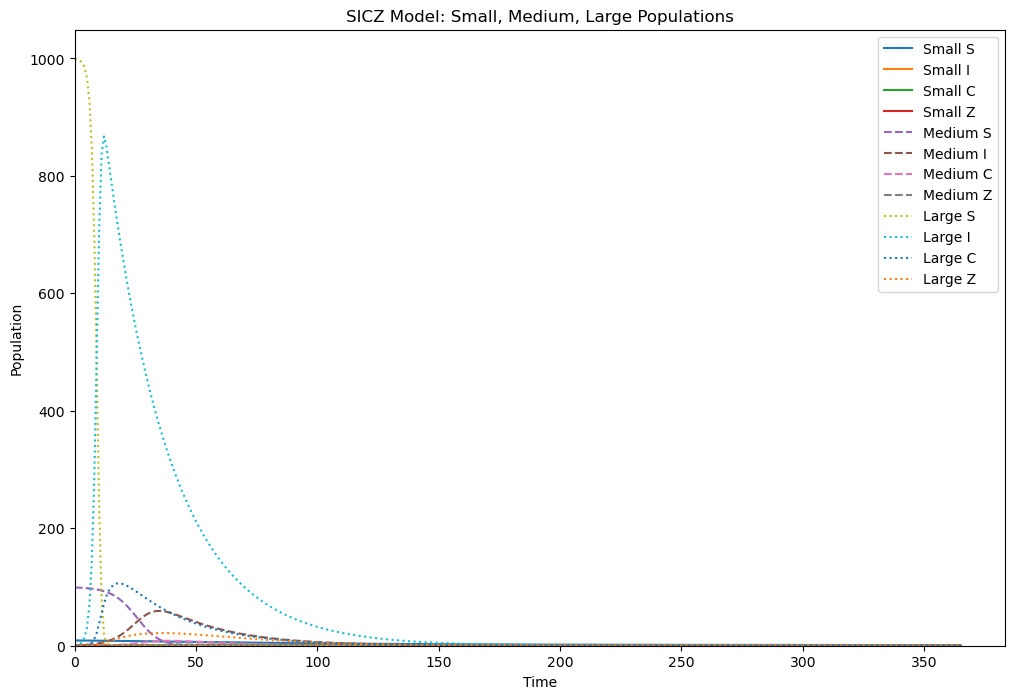

In [18]:
plt.figure(figsize=(12, 8))

plt.plot(times, resultsSICZSmall_df['S'], label='Small S')
plt.plot(times, resultsSICZSmall_df['I'], label='Small I')
plt.plot(times, resultsSICZSmall_df['C'], label='Small C')
plt.plot(times, resultsSICZSmall_df['Z'], label='Small Z')

plt.plot(times, resultsSICZMed_df['S'], label='Medium S', linestyle='--')
plt.plot(times, resultsSICZMed_df['I'], label='Medium I', linestyle='--')
plt.plot(times, resultsSICZMed_df['C'], label='Medium C', linestyle='--')
plt.plot(times, resultsSICZMed_df['Z'], label='Medium Z', linestyle='--')

plt.plot(times, resultsSICZLarge_df['S'], label='Large S', linestyle=':')
plt.plot(times, resultsSICZLarge_df['I'], label='Large I', linestyle=':')
plt.plot(times, resultsSICZLarge_df['C'], label='Large C', linestyle=':')
plt.plot(times, resultsSICZLarge_df['Z'], label='Large Z', linestyle=':')

plt.title("SICZ Model: Small, Medium, Large Populations")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()


In this assignment we analysed the SIR model, in this case it was a SIZC model used in a journal article. The code was written in R, so we had to translate it using copilot or chatgpt. This was fairly smooth, although I saw some errors when I didn't have the scipy installed. After troubleshooting and asking chatgpt for the correct syntax the code worked and I eventually had to install pandas. Installing pandas was my last error. The box and flow diagram included susceptible, infected, zoospores, carcesses of the salamander population and beta p, beta c and beta z as well as decay rate of carcasses, decay rate of the fungi zoospores, avg survival time (a), mew, and standard deviation variables. 